# Análises dos datasets

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from xml.etree import ElementTree
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import Image

---
## Dataset Face Mask Detection

##### Classes: 
Com máscara, Sem máscara, Máscara vestida incorreta

##### Quantidade de imagens: 
853 imagens

##### Link: 
https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

##### Observação: 
Este dataset contém arquivos de anotações que extrai de cada imagem ao menos uma imagem contendo uma face com uma das classes existentes

In [2]:
dataset_directory = './Datasets/Face Mask With Annotations/'
annotations_directory = dataset_directory + 'annotations/'
images_directory = dataset_directory + 'images/'
path_cropped = dataset_directory + 'cropped_images/'

#### Leitura das anotações

In [3]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

for annotation in glob.glob(annotations_directory + '/*.xml'):
    annotation = annotation.replace('\\','/')
    tree = ElementTree.parse(annotation)
    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))    

        if 'object' in element.tag:
            for attribute in list(element):
                
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height] 
                    information['file'] += [annotation.split('/')[-1][0:-4]] 
                            
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]

annotations_info_df = pd.DataFrame(information)

In [4]:
annotations_info_df['label'].value_counts().to_dict()

{'with_mask': 3232, 'without_mask': 717, 'mask_weared_incorrect': 123}

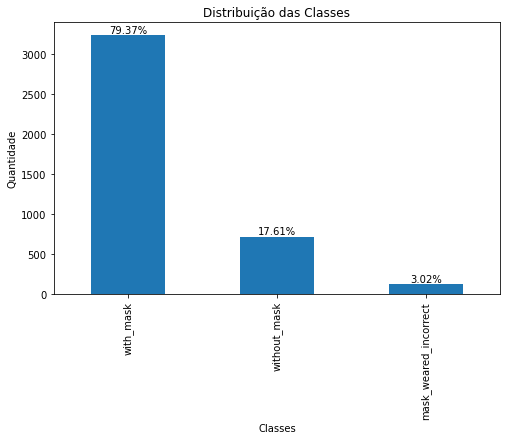

In [5]:
freq_series = annotations_info_df['label'].value_counts()
plt.figure(figsize=(8, 5))
ax = freq_series.plot(kind="bar")
ax.set_title("Distribuição das Classes")
ax.set_xlabel("Classes")
ax.set_ylabel("Quantidade")
rects = ax.patches
total_data = len(annotations_info_df['label'])

labels = [f"{round(rects[i].get_height() / total_data * 100, 2)}%" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [6]:
def render_image(image_path):
    image = cv2.imread(image_path)
    img=image_path.split('/')[-1]
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bound_box=[]
    for i in annotations_info_df[annotations_info_df['image_file']==img].index:
        (x,y,width,height)=(annotations_info_df.loc[i].xmin,annotations_info_df.loc[i].ymin,
                        annotations_info_df.loc[i].xmax,annotations_info_df.loc[i].ymax)
        bound_box.append((x,y,width,height))  
        if annotations_info_df.loc[i].label=='with_mask':
            cv2.rectangle(image, (x,y), (width, height), (0, 200, 0), 2)
            cv2.putText(image, org = (x-8 , y-8), text = "Mask", 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = (0, 200, 0))
        elif annotations_info_df.loc[i].label=='mask_weared_incorrect':
            cv2.rectangle(image, (x,y), (width, height), (255, 255, 0), 2)
            cv2.putText(image, org = (x - 8, y - 3), text = 'Incorrect', 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = (255, 255, 0))
        else:
            cv2.rectangle(image, (x,y), (width, height), (200, 0, 0), 2)
            cv2.putText(image, org = (x - 8, y - 3), text = 'No mask', 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = (200, 0, 0))
    return image
#     plt.figure(figsize=(5,5))
#     plt.imshow(image)
#     plt.show()

In [7]:
annotations_info_df['annotation_file'] = annotations_info_df['file'] + '.xml'
annotations_info_df['image_file'] = annotations_info_df['file'] + '.png'

In [8]:
annotations_info_df['image_file'][0]

'maksssksksss0.png'

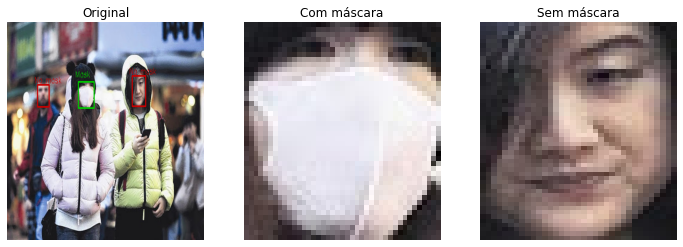

In [9]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Original")
ax1.axis('off')
ax1.imshow(render_image(os.path.join(images_directory,annotations_info_df['image_file'][0])), aspect="auto")

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Com máscara")
ax2.axis('off')
ax2.imshow(load_img(path_cropped+'maksssksksss0-1.png'), aspect="auto")


ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Sem máscara")
ax3.axis('off')
ax3.imshow(load_img(path_cropped+'maksssksksss0-2.png'), aspect="auto")

In [10]:
widths = []
heights = []

for img in os.listdir(path_cropped):
    img_path = os.path.join(path_cropped+img)
    im = Image.open(img_path)
    widths.append(im.size[0])
    heights.append(im.size[1])
    
avg_height = round(sum(heights)/len(heights))
avg_width = round(sum(widths)/len(widths))
print('Média da altura: ' + str(avg_height) + 'px')
print('Média da altura: ' + str(avg_width) + 'px')
del widths
del heights

Média da altura: 35px
Média da altura: 31px


---
## Face Mask Detection ~12K Images Dataset

##### Classes: 
Com máscara, Sem máscara

##### Quantidade de imagens: 
11.792 imagens

##### Link: 
https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset


In [11]:
path = 'Datasets/Face Mask Dataset/'
example_with_mask = path + '/Train/WithMask/1035.png'
example_without_mask = path + '/Train/WithoutMask/10.png'
dic={}
total = 0
widths = []
heights = []

In [12]:
for folder in os.listdir(path):
    for clas in os.listdir(path+'/'+folder):
        count=len(os.listdir(path+'/'+folder+'/'+clas))
        total += count
        if clas in dic:
            dic[clas] = dic[clas] + count
        else:
            dic[clas] = count
print(dic)
print(total)

{'WithMask': 5883, 'WithoutMask': 5909}
11792


In [13]:
for folder in os.listdir(path):
    for clas in os.listdir(path+'/'+folder):
        for img in os.listdir(path+'/'+folder+'/'+clas):
            img_path = os.path.join(path+'/'+folder+'/'+clas+'/'+img)
            im = Image.open(img_path)
            widths.append(im.size[0])
            heights.append(im.size[1])
    
avg_height = round(sum(heights)/len(heights))
avg_width = round(sum(widths)/len(widths))
print('Média da altura: ' + str(avg_height) + 'px')
print('Média da altura: ' + str(avg_width) + 'px')
del widths
del heights

Média da altura: 153px
Média da altura: 153px


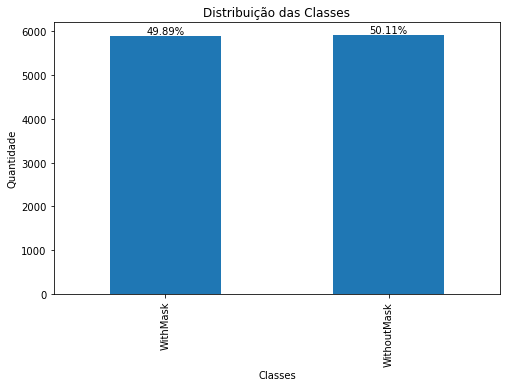

In [14]:
plt.figure(figsize=(8, 5))
series = pd.Series(dic)
ax = series.plot(kind="bar")
ax.set_title("Distribuição das Classes")
ax.set_xlabel("Classes")
ax.set_ylabel("Quantidade")
rects = ax.patches

labels = [f"{round(rects[i].get_height() / total * 100, 2)}%" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

(-0.5, 66.5, 66.5, -0.5)

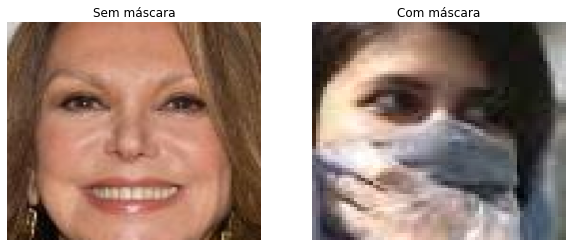

In [15]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(load_img(example_without_mask), aspect="auto")
ax1.set_title("Sem máscara")
ax1.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(load_img(example_with_mask), aspect="auto")
ax2.set_title("Com máscara")
ax2.axis('off')

(-0.5, 223.5, 223.5, -0.5)

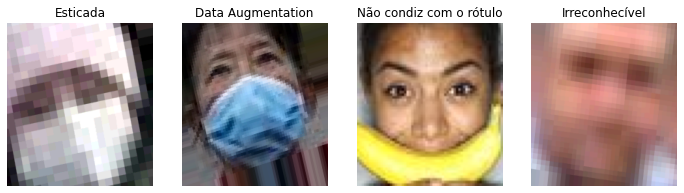

In [16]:
example_1 = path + '/Train/WithMask/Augmented_1_695546.png'
example_2 = path + '/Train/WithMask/Augmented_184_3438387.png'
example_3 = path + '/Train/WithMask/1190.png'
example_4 = path + '/Train/WithMask/Augmented_890_5070806.png'

fig = plt.figure(figsize=(12, 3))
ax1 = fig.add_subplot(1,4,1)
ax1.imshow(load_img(example_1), aspect="auto")
ax1.set_title("Esticada")
ax1.axis('off')
ax2 = fig.add_subplot(1,4,2)
ax2.imshow(load_img(example_2), aspect="auto")
ax2.set_title("Data Augmentation")
ax2.axis('off')
ax3 = fig.add_subplot(1,4,3)
ax3.imshow(load_img(example_3), aspect="auto")
ax3.set_title("Não condiz com o rótulo")
ax3.axis('off')
ax4 = fig.add_subplot(1,4,4)
ax4.imshow(load_img(example_4), aspect="auto")
ax4.set_title("Irreconhecível")
ax4.axis('off')

---
## MaskedFace-Net

##### Classes: 
Com máscara, Sem máscara

##### Quantidade de imagens: 
133.782 imagens

##### Link: 
https://github.com/cabani/MaskedFace-Net

In [17]:
path = 'Datasets/MaskedFace Net Dataset/'
example_with_mask = path + '/train/with_mask/00043_Mask.jpg'
example_without_mask = path + '/train/without_or_incorrect_mask/00017_Mask_Chin.jpg'
dic={}
total = 0
widths = []
heights = []

In [18]:
for folder in os.listdir(path):
    for clas in os.listdir(path+'/'+folder):
        count=len(os.listdir(path+'/'+folder+'/'+clas))
        total += count
        if clas in dic:
            dic[clas] = dic[clas] + count
        else:
            dic[clas] = count
print(dic)
print(total)

{'without_or_incorrect_mask': 66734, 'with_mask': 67048}
133782


In [19]:
for folder in os.listdir(path):
    for clas in os.listdir(path+'/'+folder):
        for img in os.listdir(path+'/'+folder+'/'+clas):
            img_path = os.path.join(path+'/'+folder+'/'+clas+'/'+img)
            im = Image.open(img_path)
            widths.append(im.size[0])
            heights.append(im.size[1])
    
avg_height = round(sum(heights)/len(heights))
avg_width = round(sum(widths)/len(widths))
print('Média da altura: ' + str(avg_height) + 'px')
print('Média da altura: ' + str(avg_width) + 'px')
del widths
del heights

Média da altura: 1024px
Média da altura: 1024px


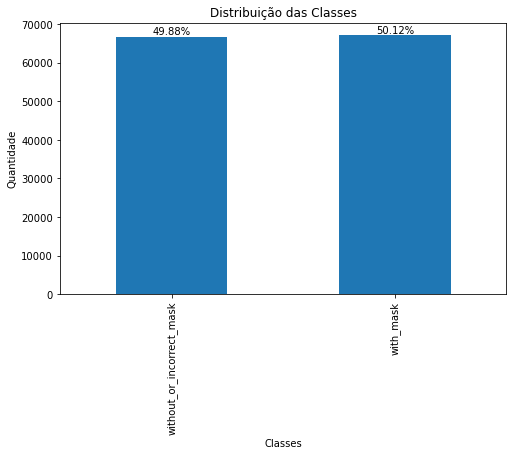

In [20]:
plt.figure(figsize=(8, 5))
series = pd.Series(dic)
ax = series.plot(kind="bar")
ax.set_title("Distribuição das Classes")
ax.set_xlabel("Classes")
ax.set_ylabel("Quantidade")
rects = ax.patches

labels = [f"{round(rects[i].get_height() / total * 100, 2)}%" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

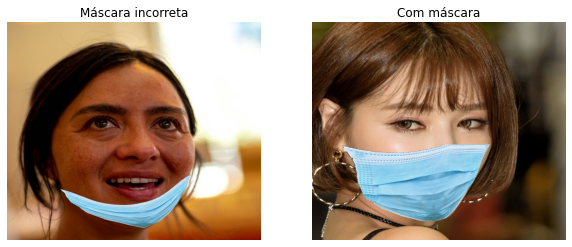

In [21]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Máscara incorreta")
ax1.axis('off')
ax1.imshow(load_img(example_without_mask), aspect="auto")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Com máscara")
ax2.axis('off')
ax2.imshow(load_img(example_with_mask), aspect="auto")